In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from secretary_problem import Simulation, Trials

sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'grid.linestyle':'--'})
%matplotlib notebook

## Produce results at different thresholds

In [2]:
n_trials = 10000  # number of trials at each threshold
n_candidates = 1000  # number of candidate for each simulation

thresholds = np.arange(0.01, 1., 0.01)
results_all_thresholds = []

for i, t in enumerate(thresholds):
    print('Testing threshold {} out of {}...'.format(i + 1, len(thresholds)), end='\r')
    T = Trials(n_trials=n_trials,
               n_candidates=n_candidates,
               threshold=t,
               n_jobs=12)
    T.run()
    results_all_thresholds.append(T.results)
print('\nAll done!')

Testing threshold 99 out of 99...
All done!


<IPython.core.display.Javascript object>


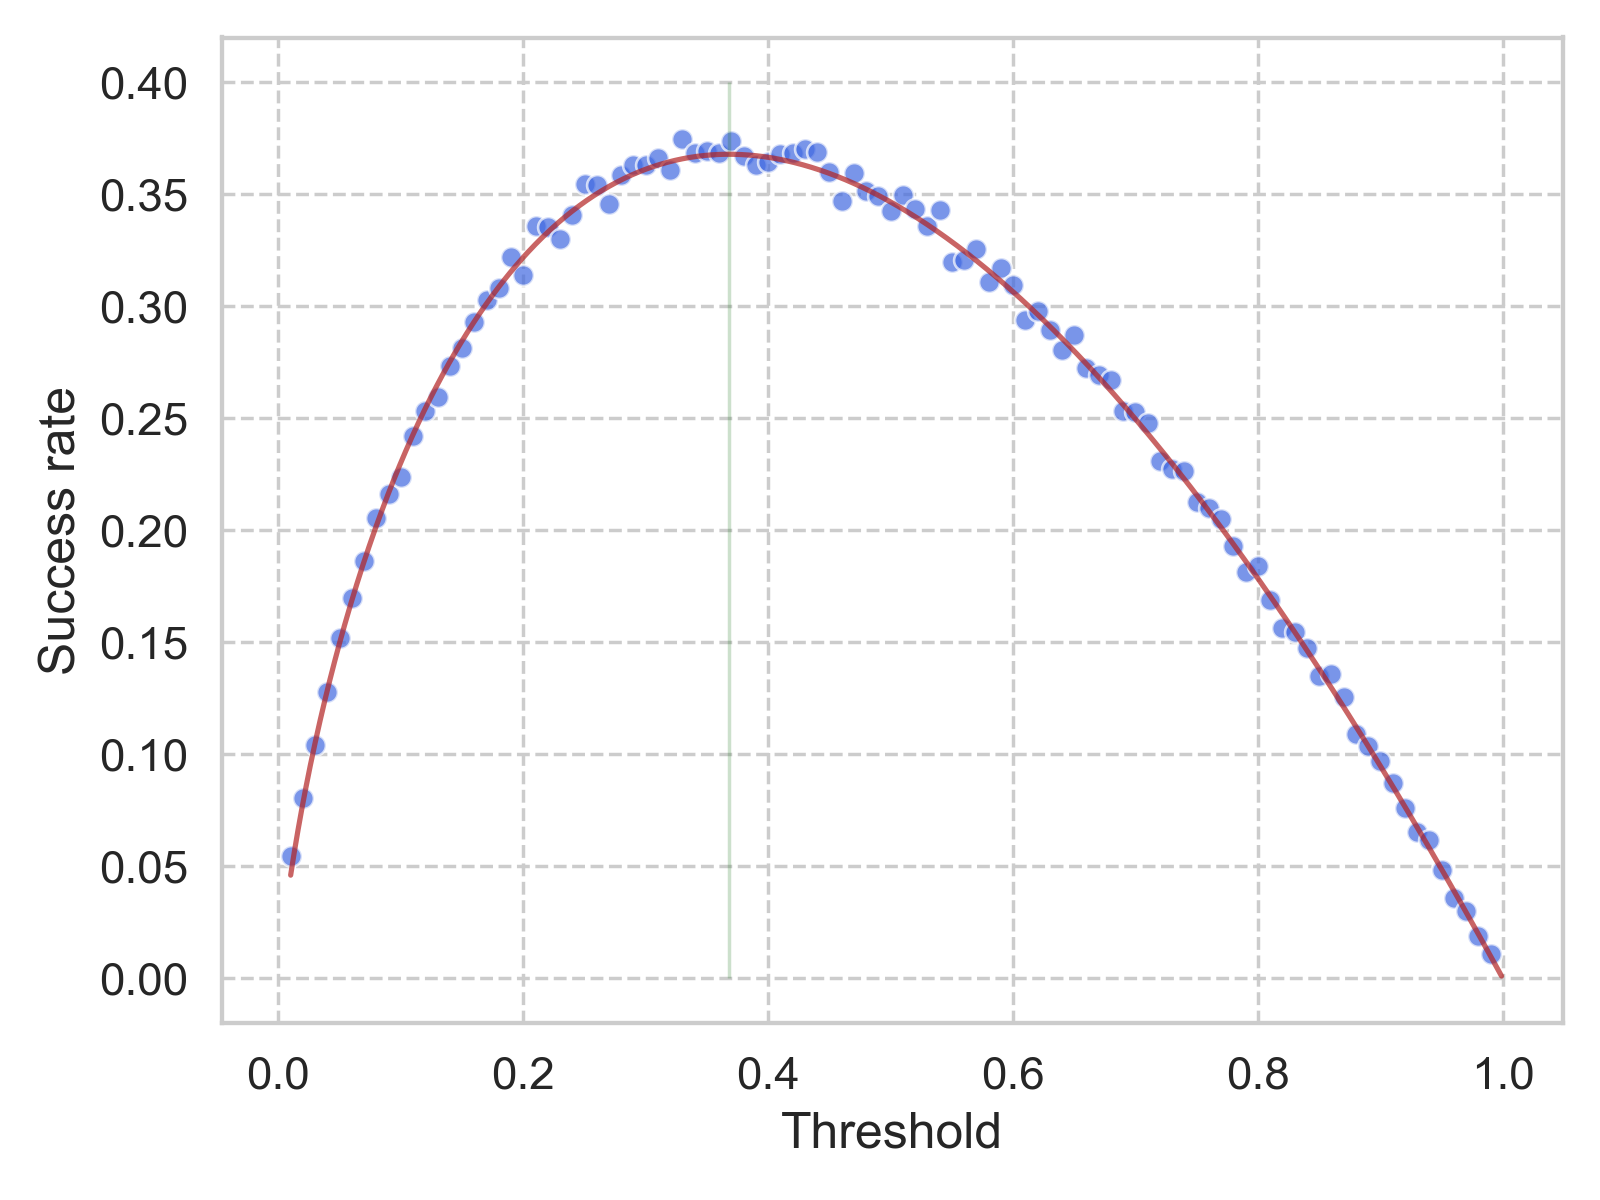

In [19]:
# plot success rates at different thresholds
rate_mean = np.mean(results_all_thresholds, axis=1)
rate_std = [x * (1 - x) / np.sqrt(n_trials) for x in rate_mean]
sns.scatterplot(x=thresholds, y=rate_mean, color='royalblue', alpha=0.7)

# # brute-force for std
# for x, m, s in zip(thresholds, rate_mean, rate_std):
#     sns.lineplot(x=[x, x], y=[m - s, m + s], color='royalblue', alpha=0.7

# therotical line
x = np.arange(0.01, 1., 0.001)
y = [-1. * e * np.log(e) for e in x]
sns.lineplot(x=x, y=y, color='firebrick', alpha=0.7)
sns.lineplot(x=[np.exp(-1)] * 2, y=[0, 0.4], color='darkgreen', alpha=0.9)
plt.xlabel('Threshold')
plt.ylabel('Success rate')
plt.tight_layout()